In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression as lr
from google.colab import drive
plt.style.use('seaborn-whitegrid')
drive.mount('/content/drive')
import time
import sklearn
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeRegressor

Mounted at /content/drive


In [2]:
!pip install git+git://github.com/rasbt/mlxtend.git
#!pip install mlxtend
#from mlxtend.evaluate import bias_variance_decomp

  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-jmmzt8x6
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-jmmzt8x6
  Created wheel for mlxtend: filename=mlxtend-0.20.0.dev0-py2.py3-none-any.whl size=1585378 sha256=3bf9a71556134abac3ab1514dd112d9e67256677da08f8268d867f624a82e0fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-idlj7xbk/wheels/8c/d2/39/72837b351435c21adf9296330ca3783d4be80aec9dae8387d1
Successfully built mlxtend
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.evaluate.bias_variance_decomp import bias_variance_decomp

In [4]:
def mape(y_true, y_pred, e=1e-10):
  y = np.concatenate([np.abs(y_true),e*np.ones(y_true.size)]).reshape(2,y_true.size)
  return np.mean(np.abs(y_true - y_pred) / np.max(y,axis=0))

In [5]:
def list_of_par(dicts):  #dicts = [dict_1, dict_2, ...]
  d = {}
  j = 0
  for i in dicts:
    d[j] = list(ParameterGrid(i))
    j += 1
  l = list(ParameterGrid(d))
  ld = []
  for p in l:
    lp = []
    ar = np.array(list(p.keys()))
    ar.sort()
    for k in ar:
      lp.append(p[k])
    ld.append(lp)
  return ld

Data preprocessing

In [6]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/svm/avocado_prices - avocado_prices.csv').drop(['Unnamed: 0'],axis=1)


date = pd.to_datetime(data['Date'])
data['month'] = date.dt.month
data['day'] = date.dt.day

data['type'] = data['type'].replace(['conventional','organic'],[0,1])
countr = data['region'].unique()
data['region'] = data['region'].replace(countr,np.arange(countr.size))

y = np.array(data['AveragePrice'])
data1 = data.copy().drop(['Date','AveragePrice'], axis=1)
X = np.array(data1)
X = (X-X.mean(axis=0))/X.std(axis=0)
m = y.mean()
si = y.std()
y = (y-m)/si
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


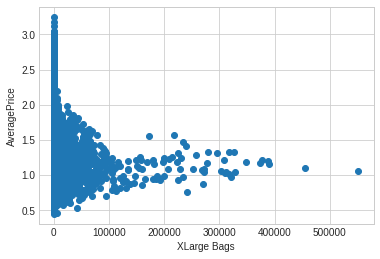

In [7]:
def vis(data,main_atrr,secon):
  y = data[main_atrr]
  x = data[secon]
  plt.plot(x,y,'o')
  plt.xlabel(secon)
  plt.ylabel(main_atrr)

vis(data,'AveragePrice','XLarge Bags')

In [34]:
X_train, X_tv, y_train, y_tv = train_test_split(X, y, test_size=0.4)
X_test, X_val, y_test, y_val = train_test_split(X_tv, y_tv,test_size=0.5)


Neural networks

In [35]:
param={ 'hidden_layer_sizes':(100),
        'solver':'sgd',
        'activation':'relu',
        'learning_rate':'adaptive',
        'alpha':0.005,
        'max_iter':1000
       }
start_time = time.time()
# пошук гіперпараметрів нейронної мережі решітчастим пошуком
#NN = MLPRegressor(warm_start=True, early_stopping=True)
'''split = sklearn.model_selection.KFold(shuffle=True,random_state=1)
grid = sklearn.model_selection.GridSearchCV(NN,param,cv=split).fit(X_val,y_val)
param_best = grid.best_params_'''

param_best = param
NN_best = MLPRegressor(warm_start=True, early_stopping=True,**param_best).fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))
print('training score = ', NN_best.score(X_train,y_train))
print('test score = ', NN_best.score(X_test,y_test))
print('loss values: ',NN_best.loss_curve_)

--- 77.03605937957764 seconds ---
training score =  0.5864898778471384
test score =  0.5696676419216778
loss values:  [0.4442710184404207, 0.32735932655860417, 0.2925599122189292, 0.2809651926664624, 0.275934233748583, 0.27283094943083996, 0.27046225761094494, 0.2684490178393514, 0.26671517773019726, 0.26511641736515074, 0.26372010659125616, 0.262469470265357, 0.26127376033836985, 0.2602288676512305, 0.25928015726349457, 0.2583161433847201, 0.257548930801214, 0.25669600505080375, 0.2560596049906162, 0.2554268980260843, 0.25469341755529423, 0.25403507170176576, 0.25346158775034705, 0.252890008796447, 0.2523101552677518, 0.2518109303523124, 0.25131536079120614, 0.250834043449697, 0.25043101296996484, 0.24994540288624023, 0.24952675315123576, 0.2491151095161174, 0.24866788338978346, 0.24836113605552887, 0.24807563917695996, 0.24761019311396318, 0.2472534301385505, 0.24697598655201905, 0.24647855033243118, 0.24648062938911947, 0.24598544796415261, 0.24566532650443665, 0.2453792364745091, 0

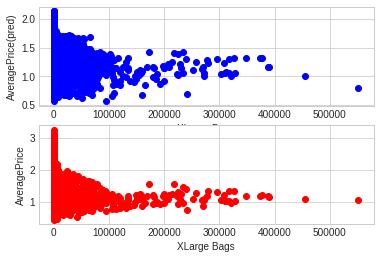

In [10]:
def vis_pr(data,secon_atrr,main_atrr,y_pred):
  fig,ax = plt.subplots(2)
  c = secon_atrr
  ax[0].plot(data[c],y_pred,'o',color='blue')
  ax[0].set_xlabel(c)
  ax[0].set_ylabel(main_atrr+'(pred)')
  ax[1].plot(data[c],data[main_atrr],'o',color='red')
  ax[1].set_xlabel(c)
  ax[1].set_ylabel(main_atrr)

vis_pr(data, 'XLarge Bags', 'AveragePrice', NN_best.predict(X)*si+m)

GradientBoosting_1

In [11]:
"""model1 = GradientBoostingRegressor(n_estimators = 1900, max_depth = 10)
param1 = {'learning_rate':0.001, 
          'subsample':0.75,
          'max_features':'sqrt',
          'loss':'squared_error'}

'''split = sklearn.model_selection.KFold(shuffle=True,random_state=1)
grid1 = sklearn.model_selection.GridSearchCV(model1,param1,cv=split).fit(X_val,y_val)'''

model1_bestest = model1.fit(X_val, y_val)
errors = [mean_squared_error(y_test, y_pred) for y_pred in model1_bestest.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)+1
model1_best = GradientBoostingRegressor(**param1, n_estimators=bst_n_estimators, max_depth = 10)

model1_best.fit(X_train, y_train)"""


"model1 = GradientBoostingRegressor(n_estimators = 1900, max_depth = 10)\nparam1 = {'learning_rate':0.001, \n          'subsample':0.75,\n          'max_features':'sqrt',\n          'loss':'squared_error'}\n\n'''split = sklearn.model_selection.KFold(shuffle=True,random_state=1)\ngrid1 = sklearn.model_selection.GridSearchCV(model1,param1,cv=split).fit(X_val,y_val)'''\n\nmodel1_bestest = model1.fit(X_val, y_val)\nerrors = [mean_squared_error(y_test, y_pred) for y_pred in model1_bestest.staged_predict(X_test)]\nbst_n_estimators = np.argmin(errors)+1\nmodel1_best = GradientBoostingRegressor(**param1, n_estimators=bst_n_estimators, max_depth = 10)\n\nmodel1_best.fit(X_train, y_train)"

In [33]:
param1 = {'learning_rate':0.001, 
          'subsample':0.75,
          'max_features':'sqrt',
          'loss':'squared_error'}

model1_best = GradientBoostingRegressor(**param1, n_estimators = 1834, max_depth = 10).fit(X_train, y_train)

In [32]:
model1_best.score(X_test,y_test)

0.8155215583674602

In [14]:
model1_best.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.001,
 'loss': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1834,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.75,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

GradientBoosting_2

In [15]:
class Ansamble_pro:  # градієнтний бустинг з різних моделей (немає певного базового класу)

  def __init__(self, models, list_of_params=[]):
    self.list_of_params = list_of_params
    self.models = models   #list of models
    if list_of_params!=[]:
      i = 0
      for model in self.models:
        model.set_params(**list_of_params[i])
        i+=1
    

  def set_params(self, **params): # params = {'list_of_params': list_of_params}
    i = 0 
    for model in self.models:
      model.set_params(**(params['list_of_params'][i]))
      i+=1
    return self
  
  def get_params(self,deep=True):
    d = {}
    d['models'] = self.models
    d['list_of_params'] = self.list_of_params
    return d
  
  def fit(self,X,y): #implementation of the gradient boosting
    dy = y
    for model in self.models:
      model.fit(X,dy)
      dy_pr = model.predict(X)
      dy = dy-dy_pr
    return self

  def predict(self,X):
    y_pr = 0
    for model in self.models:
      y_pr += model.predict(X)
    return y_pr

  def score(self,X,y):
    y_pr = self.predict(X)
    return metrics.r2_score(y, y_pr)

In [16]:
"""model2 = Ansamble_pro(models=[MLPRegressor(early_stopping = True), SVR(), lr()])
param2_MPL = { 'hidden_layer_sizes':[100],
        'solver':['sgd'],
        'activation':['relu'],
        'learning_rate':['adaptive'],
        'alpha':[0.005],
        'max_iter':[1000]
       }
c = [1,0.1,0.03,5,12,3,7,0.4,0.7,0.06,15,0.001,0.01]
e = [0.01]
param2_SVR = {'C': c ,'epsilon': e }
param2_lr = {'copy_X': [True]}
param2 = {'list_of_params': list_of_par([param2_MPL, param2_SVR, param2_lr])}
# пошук гіперпараметрів за решітчастим пошуком
'''split = sklearn.model_selection.KFold(shuffle=True,random_state=1)
grid2 = sklearn.model_selection.GridSearchCV(model2,param2,cv=split).fit(X_val,y_val)
param2_best = grid2.best_params_'''
# пошук гіперпараметрів в циклі (менш ефективно, але швидше)
l = []
for p in param2['list_of_params']:
  model2_best = Ansamble_pro(**{'list_of_params':p}, models=[MLPRegressor(early_stopping = True),SVR(), lr()]).fit(X_val, y_val)
  l.append(model2_best.score(X_test,y_test))
l = np.array(l)
param2_best = param2['list_of_params'][np.argmax(l)]"""


"model2 = Ansamble_pro(models=[MLPRegressor(early_stopping = True), SVR(), lr()])\nparam2_MPL = { 'hidden_layer_sizes':[100],\n        'solver':['sgd'],\n        'activation':['relu'],\n        'learning_rate':['adaptive'],\n        'alpha':[0.005],\n        'max_iter':[1000]\n       }\nc = [1,0.1,0.03,5,12,3,7,0.4,0.7,0.06,15,0.001,0.01]\ne = [0.01]\nparam2_SVR = {'C': c ,'epsilon': e }\nparam2_lr = {'copy_X': [True]}\nparam2 = {'list_of_params': list_of_par([param2_MPL, param2_SVR, param2_lr])}\n# пошук гіперпараметрів за решітчастим пошуком\n'''split = sklearn.model_selection.KFold(shuffle=True,random_state=1)\ngrid2 = sklearn.model_selection.GridSearchCV(model2,param2,cv=split).fit(X_val,y_val)\nparam2_best = grid2.best_params_'''\n# пошук гіперпараметрів в циклі (менш ефективно, але швидше)\nl = []\nfor p in param2['list_of_params']:\n  model2_best = Ansamble_pro(**{'list_of_params':p}, models=[MLPRegressor(early_stopping = True),SVR(), lr()]).fit(X_val, y_val)\n  l.append(model2_

In [17]:
"""model2_best = Ansamble_pro(**{'list_of_params':param2_best}, models=[MLPRegressor(early_stopping = True),SVR(), lr()]).fit(X_train, y_train)
param2_best"""

"model2_best = Ansamble_pro(**{'list_of_params':param2_best}, models=[MLPRegressor(early_stopping = True),SVR(), lr()]).fit(X_train, y_train)\nparam2_best"

In [18]:
"""model2_best.score(X_test,y_test)"""

'model2_best.score(X_test,y_test)'

Модель з найкращими параметрами

In [19]:
model20_best = Ansamble_pro(models=[MLPRegressor(max_iter = 1000), SVR(C=100), lr()]).fit(X_train, y_train)


In [20]:
j = 0
for i in model20_best.models:
  print('model'+str(j),i.get_params())
  j += 1
  
model20_best.score(X_test,y_test)

model0 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
model1 {'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
model2 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


0.6493433250522779

Metrics

Neural Network

In [21]:
def f(y):
  return si*y+m

def f_1(y):
  return (y-m)/si

y_train = f(y_train)
y_test = f(y_test)

In [22]:
s={}
y_predtr = f(NN_best.predict(X_train))
y_predts = f(NN_best.predict(X_test))

r2_train = metrics.r2_score(y_train, y_predtr)
s['r2_train'] = r2_train
r2_test = metrics.r2_score(y_test, y_predts)
s['r2_test'] = r2_test
rmse_train = metrics.mean_squared_error(y_train, y_predtr)
s['rmse_train'] = rmse_train
rmse_test = metrics.mean_squared_error(y_test, y_predts)
s['rmse_test'] = rmse_test
mae_train = metrics.mean_absolute_error(y_train, y_predtr)
s['mae_train'] = mae_train
mae_test = metrics.mean_absolute_error(y_test, y_predts)
s['mae_test'] = mae_test
mape_train = mape(y_train, y_predtr)
s['mape_train'] = mape_train
mape_test = mape(y_test, y_predts)
s['mape_test'] = mape_test

for i in s.keys():
  print(i+'='+str(s[i]))

model01 = MLPRegressor(**param.copy())
mse, bias, var = bias_variance_decomp(model01, X_train[:200], y_train[:200], X_test[:200], y_test[:200], loss='mse', random_seed=1)
print('bias(avg)=',bias)
print('variance(avg)=',var)

r2_train=0.6011402077698556
r2_test=0.5807686368251348
rmse_train=0.06564157701998197
rmse_test=0.06688113560565513
mae_train=0.18926375119257494
mae_test=0.19047401037909997
mape_train=0.13997444765233036
mape_test=0.13873059014491182
bias(avg)= 0.0890075854821368
variance(avg)= 0.028727601602610623


GradientBoosting_1

dependency r2_score with n_estimators


Text(0.5, 0, 'n_estimators')

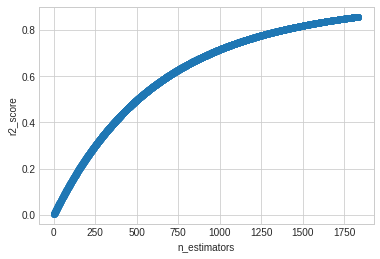

In [23]:
print('dependency r2_score with n_estimators')
y_pr = list(model1_best.staged_predict(X))
r2 = []
n_estimators = np.arange(1,len(y_pr)+1)
for i in y_pr:
  r2.append(metrics.r2_score(y, i))

fig, ax = plt.subplots(1) 
ax.plot(n_estimators,r2,'o')
ax.set_ylabel('r2_score')
ax.set_xlabel('n_estimators')

In [24]:
s={}
y_predtr = f(model1_best.predict(X_train))
y_predts = f(model1_best.predict(X_test))

r2_train = metrics.r2_score(y_train, y_predtr)
s['r2_train'] = r2_train
r2_test = metrics.r2_score(y_test, y_predts)
s['r2_test'] = r2_test
rmse_train = metrics.mean_squared_error(y_train, y_predtr)
s['rmse_train'] = rmse_train
rmse_test = metrics.mean_squared_error(y_test, y_predts)
s['rmse_test'] = rmse_test
mae_train = metrics.mean_absolute_error(y_train, y_predtr)
s['mae_train'] = mae_train
mae_test = metrics.mean_absolute_error(y_test, y_predts)
s['mae_test'] = mae_test
mape_train = mape(y_train, y_predtr)
s['mape_train'] = mape_train
mape_test = mape(y_test, y_predts)
s['mape_test'] = mape_test

for i in s.keys():
  print(i+'='+str(s[i]))

model11 = GradientBoostingRegressor(**model1_best.get_params())
mse1, bias1, var1 = bias_variance_decomp(model11, X_train[:200], y_train[:200], X_test[:200], y_test[:200], loss='mse', random_seed=1)
print('bias(avg)=',bias1)
print('variance(avg)=',var1)

r2_train=0.887373233442563
r2_test=0.8122708500493366
rmse_train=0.01853533175192982
rmse_test=0.02994894904784987
mae_train=0.10361951673264774
mae_test=0.1279610430532976
mape_train=0.07871221955270903
mape_test=0.0961668591587412
bias(avg)= 0.06639072098281018
variance(avg)= 0.004467455362456122


In [28]:
tree = DecisionTreeRegressor(max_depth = 10).fit(X_train, y_train)
print('r2_score for one tree = ',tree.score(X_test, y_test))
mse10, bias10, var10 = bias_variance_decomp(tree, X_train[:200], y_train[:200], X_test[:200], y_test[:200], loss='mse', random_seed=1)
print('bias(avg)=',bias10)
print('variance(avg)=',var10)

r2_score for one tree =  0.731018979297384
bias(avg)= 0.06271822783035727
variance(avg)= 0.07996242156477336


GradientBoosting_2

In [29]:
s={}
y_predtr = f(model20_best.predict(X_train))
y_predts = f(model20_best.predict(X_test))
mod = model20_best.models

r2_train = metrics.r2_score(y_train, y_predtr)
s['r2_train'] = r2_train
r2_test = metrics.r2_score(y_test, y_predts)
s['r2_test'] = r2_test
rmse_train = metrics.mean_squared_error(y_train, y_predtr)
s['rmse_train'] = rmse_train
rmse_test = metrics.mean_squared_error(y_test, y_predts)
s['rmse_test'] = rmse_test
mae_train = metrics.mean_absolute_error(y_train, y_predtr)
s['mae_train'] = mae_train
mae_test = metrics.mean_absolute_error(y_test, y_predts)
s['mae_test'] = mae_test
mape_train = mape(y_train, y_predtr)
s['mape_train'] = mape_train
mape_test = mape(y_test, y_predts)
s['mape_test'] = mape_test

for i in s.keys():
  print(i+'='+str(s[i]))
y_t = f_1(y_test)
j = 0
for i in mod:
  r2 = metrics.r2_score(y_t, i.predict(X_test))
  print('r2_score for model'+str(j)+' =',r2)
  y_t = y_t-i.predict(X_test)
  j += 1

model21 = Ansamble_pro(models=[MLPRegressor(max_iter=1000), SVR(C=100), lr()])
mod = model21.models
mse2, bias2, var2 = bias_variance_decomp(model21, X_train[:200], y_train[:200], X_test[:200], y_test[:200], loss='mse', random_seed=1)
print('bias(avg)=',bias2)
print('variance(avg)=',var2)

r2_train=0.688250773076472
r2_test=0.6493433250522779
rmse_train=0.05130552461957087
rmse_test=0.05594122646407197
mae_train=0.15609520923563666
mae_test=0.16707834298606844
mape_train=0.111788653891024
mape_test=0.11915484072696389
r2_score for model0 = 0.6284776518257396
r2_score for model1 = 0.05344522484626335
r2_score for model2 = 0.0011359489023619052
bias(avg)= 0.09272989956439494
variance(avg)= 0.09096961349201806


In [30]:
j = 0
for i in mod:
  mse2, bias2, var2 = bias_variance_decomp(i, X_train[:200], y_train[:200], X_test[:200], y_test[:200], loss='mse', random_seed=1)
  print('model'+str(j))
  print('bias(avg)=',bias2)
  print('variance(avg)=',var2)
  j += 1

model0
bias(avg)= 0.0999889274380062
variance(avg)= 0.024845406311691874
model1
bias(avg)= 0.09627540940664488
variance(avg)= 0.05900604670478922
model2
bias(avg)= 0.0875800525880237
variance(avg)= 0.08350831437988906


**Conclusion:**

**Опис моделей:** Градієнтний бустинг - ансамбль, в якому моделі навчаються послідовно і кожна наступна модель передбачає похибку, яку зробила попередня модель.

MLPRegressor - багатошаровий персептрон (нейронна мережа) для задач регресії, в якому на кожному шарі використовується одна і та сама функція активації ('relu','sigmoid','tanh' або 'identity') мінімізуючи mean_squared_error. 

SVR - метод опорних векторів для задач регресії.

GradientBoostingRegressor - градієнтний бустинг з використанням дерев рішень для регресії.

Ansamble_pro - градієнтний бустинг з різних моделей (немає певного базового класу).

**Результати роботи:** Згідно отриманих значень метрик можна стверджувати, що най ефективнішою є модель GradientBoostingRegressor(n_estimtors=1834, max_depth=10) оскільки в цій моделі передбачені механізми для контролю незалежності моделей у ансамблі (тренування на випадкових піднаборах, під час кожного спліту вибирати ознаку з випадкового піднабору ознак і т.д.). Такі механізми зменшують дисперсію моделі за рахунок збільшення зміщення, що в свою чергу виключає ефект перенавчання і тому якщо не зловживати цими методами, то можна досягти значно кращих результатів ніж на базовій моделі. Однак важливим недоліком градієнтного бустингу є необхідність послідовного тренування, що часто потребує значно більших ресурсів ніж тренування базового прогнозатора. Також можна сказати, що пошук оптимальних гіперпараметрів(а точніше саме n_estimators) з використання ранньої зупинки є значно ефективніший за решітчастий пошук, хоча для нейронної мережі значної різниці не спостерігалось.